# Toxic Comment Classification Challenge
[Identify and classify toxic online comments](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

## 项目简介
在互联网上匿名有时会让人们说出他们在现实生活中通常不会说的话。 本次的项目是让我们学习模型如何过滤掉平台上的谩骂、仇恨等话题等的评论。

## 数据集
这里的数据集来自wiki语料库数据集，它被人类评分者标注为毒性评论。

该语料库包含来自2004-2015年用户页面和文章讨论的63M评论。

不同的平台/站点可以对其毒性筛选过程有不同的标准。 因此，这些评论被标记在以下五个类别中

* toxic 有毒的
* severe_toxic 严重有毒的
* obscene 淫秽的
* threat 威胁的
* insult 侮辱的
* identity_hate 身份仇恨的

标记是通过众包完成的，这意味着数据集由不同的人评分，标记也可能不是100%准确。 [这里](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/46131)也在讨论同样的问题。

## 本项目的目录：

* Part-1: 多标签分类任务简介
* Part-2: 问题定义和评价指标
* Part-3: 数据分析 (EDA)
* Part-4: 平衡样本集
* Part-4: 特征工程
* Part-5: 多标签分类技术

## Part-1: 多标签分类任务简介

**多标签分类起源于对文本分类问题的研究，其中每个文档可能同时属于几个预定义的主题。**

文本数据的多标签分类是一个重要的问题。 例子有新闻文章、电子邮件、电影分类等。 例如，网络新闻往往含有丰富的语义，一篇文章既可以属于“经济”也可以属于“文化”。给网络新闻打多标签可以更好地反应文章的真实意义，方便日后的分类和使用。又或者，根据电影的情节摘要找到电影所属的类型。或基于电影海报的体裁的多标签分（这融入了计算机视觉领域的知识）。

<img src="https://miro.medium.com/max/2000/1*r0gYXMSQf5VhdMyl2bRDyg.png" width="80%">

<img src="https://miro.medium.com/max/542/1*-be_KRYy6hMZTZk7UONw_A.png" width="40%">

在多标签分类中，训练集由每个与一组标签相关联的实例组成，任务是通过分析具有已知标签集的训练实例来预测未见实例的标签集。

**多类分类和多标签分类的区别在于，在多类问题中，类是相互排斥的，而对于多标签问题，每个标签代表不同的分类任务，但任务在某种程度上是相关的。**
例如，多类分类假设每个样本被分配给一个标签，并且只有一个标签：水果可以是苹果或梨，但不能同时两者兼而有之。 然而，一个多标签分类的例子可能是，一个文本可能是关于任何宗教，政治，金融或教育同时或没有这些。


## Part-2: 问题定义和评价指标
### 问题定义：
毒性评论分类是一个具有高度不平衡数据集的多标签文本分类问题。

我们面临的挑战是建立一个多标签模型，能够检测不同类型的毒性，如威胁、淫秽、侮辱和基于身份的歧视等。 我们需要创建一个模型来预测每种类型的毒性对每个评论的概率。

[这里](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview/evaluation)可以找到这个问题的Kaggle链接。

### 评价指标：

> 注：Kaggle挑战中的最初评估度量是Log-Loss，后来改为AUC。但在本课中，我们也对其他评估指标进行了讨论。

单标签的评价指标通常不同于多标签的评价措施。 在单标签分类中，我们使用简单的度量，如精确率、召回率、准确性等。也就是说，在单标签分类中，准确性只是：

<img src="https://miro.medium.com/max/454/1*A6N4fAv_VXVgdcU-KCabfw.png" width="40%">

在多标签分类中，错误分类**不再是一个硬性的错误或正确判定**。一个预测只要包含实际标签的子集都应该被认为比不包含其中任何一个标签的预测更好，也就是说正确地预测三个标签中的两个，也比预测根本没有标签要好。

### 微观平均和宏观平均（基于标签的措施）：

为了测量多类分类器，我们必须以某种方式平均出类。 这样做有两种不同的方法，即**微观平均**和**宏观平均**。

在微观平均中，对每个类的所有TPs、TNs、FPs和FNs进行总结，然后取平均值。
我们总结了系统对不同集合的单个真阳性、真阴性、假阳性和假阴性及其应用。 微平均F1-Score将是两个以上方程的调和平均数。

<img src="https://miro.medium.com/max/1122/1*nWbsBPAFl3WmU_bgtahqKQ.png" width="80%">

宏观平均是不考虑重复数据的。 我们只取系统在不同集合上的精度和召回率的平均值。
当您想了解系统在数据集中的整体执行情况时，可以使用宏观平均方法。 它不反映任何具体决定。 因此，如果数据集大小不同时，我们更倾向于使用微观平均。

<img src="https://miro.medium.com/max/976/1*AwYON8c48oMm5AcqVxLiWQ.png" width="80%">

### Hamming-Loss（基于示例的度量）：
最简单地说，Hamming-Loss是错误预测的标签的分数，即错误标签的分数占标签总数的比例。
 
<img src="https://miro.medium.com/max/1400/1*_qeJQPY9CKki2xouAQr6fg.png" width="80%">

### 精确匹配比（子集精度）：
这是最严格的度量，表示所有标签分类正确的样本的百分比。

<img src="https://miro.medium.com/max/776/1*iAqf__O54Tp0HzpLhaONkA.png" width="50%">

这种度量的缺点是多类分类问题有可能部分正确，但在这里我们忽略了那些部分正确的匹配。
在scikit-learn中有一个函数实现子集精度，称为**accuracy_score**。

> 注：我们将使用accuracy_score功能来评估我们在这个项目中的所有模型。

## Part-3: 数据分析 (EDA):
>  探索性数据分析是数据分析过程中的重要步骤之一。 在这里，重点是理解手头的数据：比如制定正确的问题来询问数据集，如何操作数据源以获得所需的答案，等等。

### 首先导入必要的包

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

### 接下来，我们将CSV文件中的数据加载到Pandas DataFrame中，并检查其属性。

In [3]:
data_path = "jigsaw-toxic-comment-classification-challenge/train.csv"

In [4]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(159571, 8)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 检查缺失值

In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 检查正负样本情况：统计每个标签下的评论数量

In [7]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [8]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


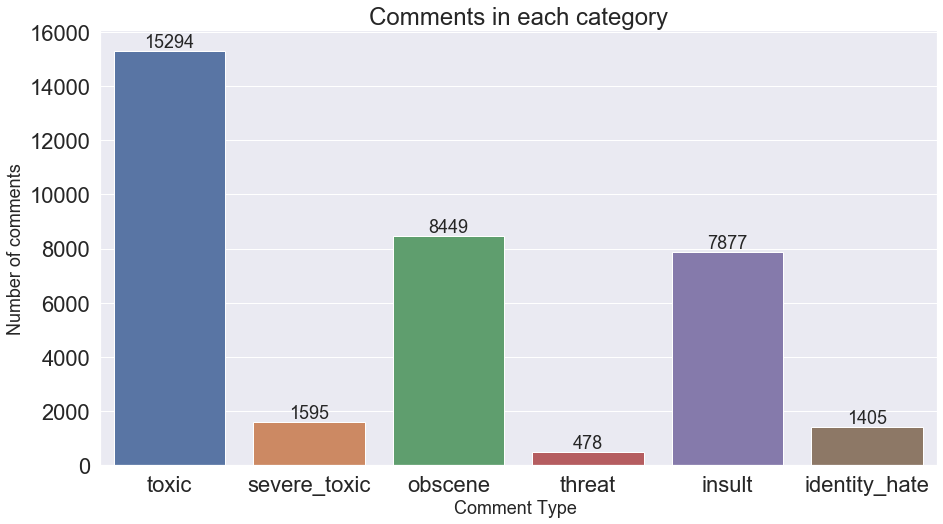

In [10]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

###  计算具有多个标签的评论数

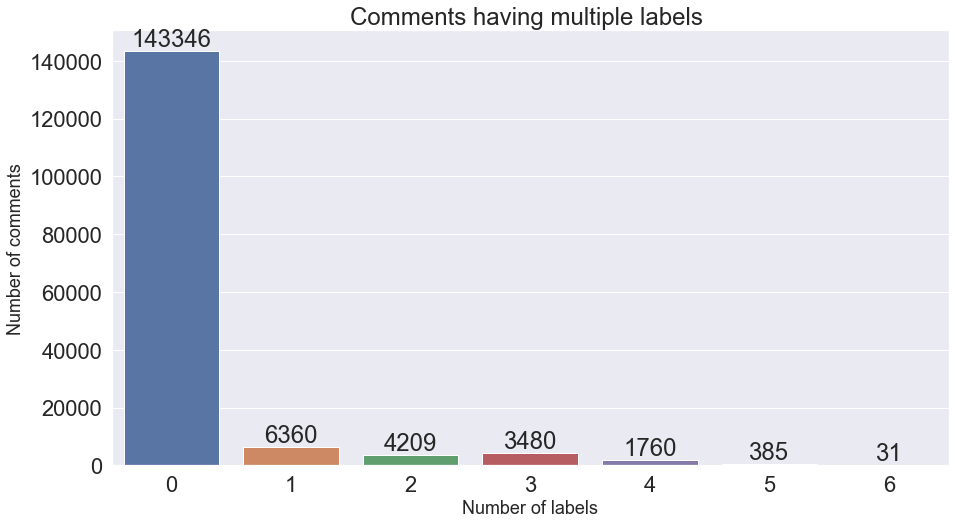

In [11]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

只有~10%的评论被标记为有某种毒性。

## 哪些标签是一起的？
现在让我们来看看标签在一起的频率。使用相关图。

In [12]:
#importing the dataset
train=pd.read_csv("jigsaw-toxic-comment-classification-challenge/train.csv")
test=pd.read_csv("jigsaw-toxic-comment-classification-challenge/test.csv")
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)

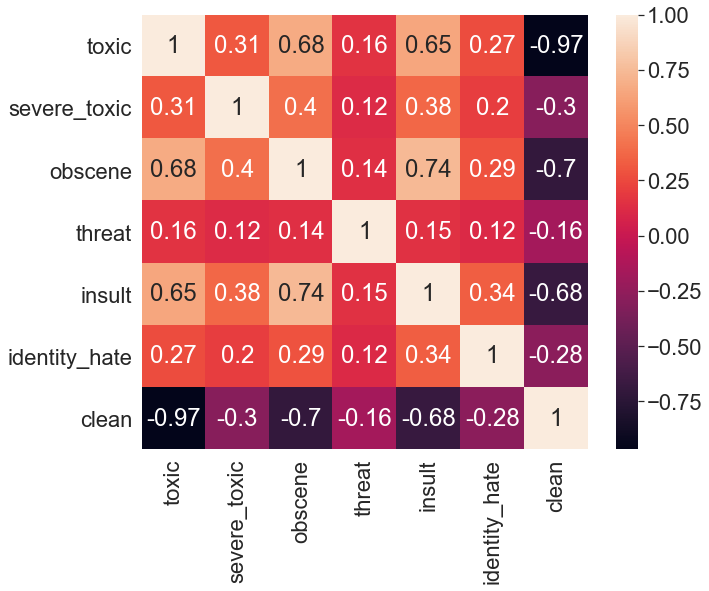

In [13]:
temp_df=train.iloc[:,2:]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

上面的情节表明了一种共同发生的模式，但使用Pearson相关系数在这里不适用，因为调用的变量是（二）分类变量。

因此，为了在两个分类变量之间找到一个模式，我们可以使用其他工具，比如混淆矩阵/交叉表

In [14]:
# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [15]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

**观察到一些有趣的点：**

 * 严重有毒的评论总是有毒的
 * 除少数例外情况外，其他类似乎是有毒的一个子集

## 评论样例

In [16]:
# print("toxic:")
print(train[train.severe_toxic==1].iloc[3,1])
#print(train[train.severe_toxic==1].iloc[5,1])

Hi 

Im a fucking bitch.

50.180.208.181


In [17]:
# print("severe_toxic:")
print(train[train.severe_toxic==1].iloc[4,1])
#print(train[train.severe_toxic==1].iloc[4,1])

What a motherfucking piece of crap those fuckheads for blocking us!


In [18]:
# print("Threat:")
print(train[train.threat==1].iloc[1,1])
#print(train[train.threat==1].iloc[2,1])

I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


In [19]:
# print("Obscene:")
print(train[train.obscene==1].iloc[1,1])
#print(train[train.obscene==1].iloc[2,1])

You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [20]:
# print("identity_hate:")
print(train[train.identity_hate==1].iloc[4,1])
#print(train[train.identity_hate==1].iloc[4,1])

u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie


**观察到一些奇怪的现象**

- 有些评论是极其简单的复制粘贴相同的东西
- 注释仍然可以包含IP地址（例如：62.158.73.165）、用户名(例如：ARKJEDI10)和一些神秘数字(我假设是文章ID)

其中，第2点可能导致巨大的过度拟合。

### 使用词云展示高频词：每个评论类别中大多数使用过的单词

词云-用于展示较频繁的词：

让我们来看看与这些有毒类相关的单词。

图表描述：这里的视觉是单词云（即）更频繁的单词出现更大。 这里给出了一种用有趣的图片创建单词云的很酷的方法。 它涉及以下步骤。

 * 搜索图像
 * 在cell中加载，并使用编解码器包将其导入为图像编码
 * 以新图像作为蒙版创建Word云

In [21]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

stopword = set(STOPWORDS)

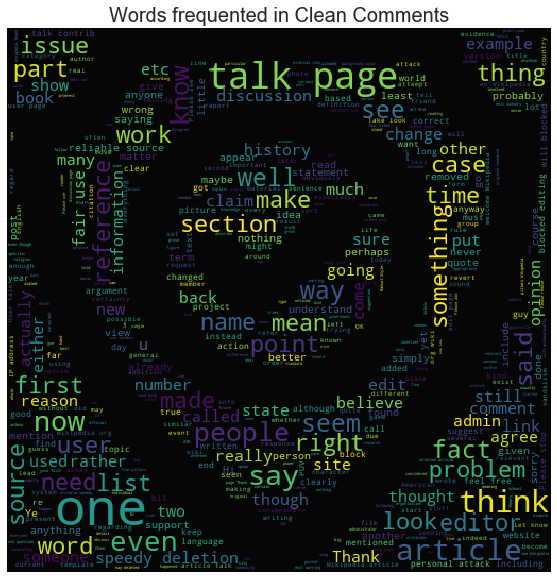

In [22]:
# 搜索图像
#clean comments
# 在cell中加载，并使用编解码器包将其导入为图像编码
clean_mask=np.array(Image.open("Img/safe-zone.png"))
clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
# 以新图像作为蒙版创建Word云
wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

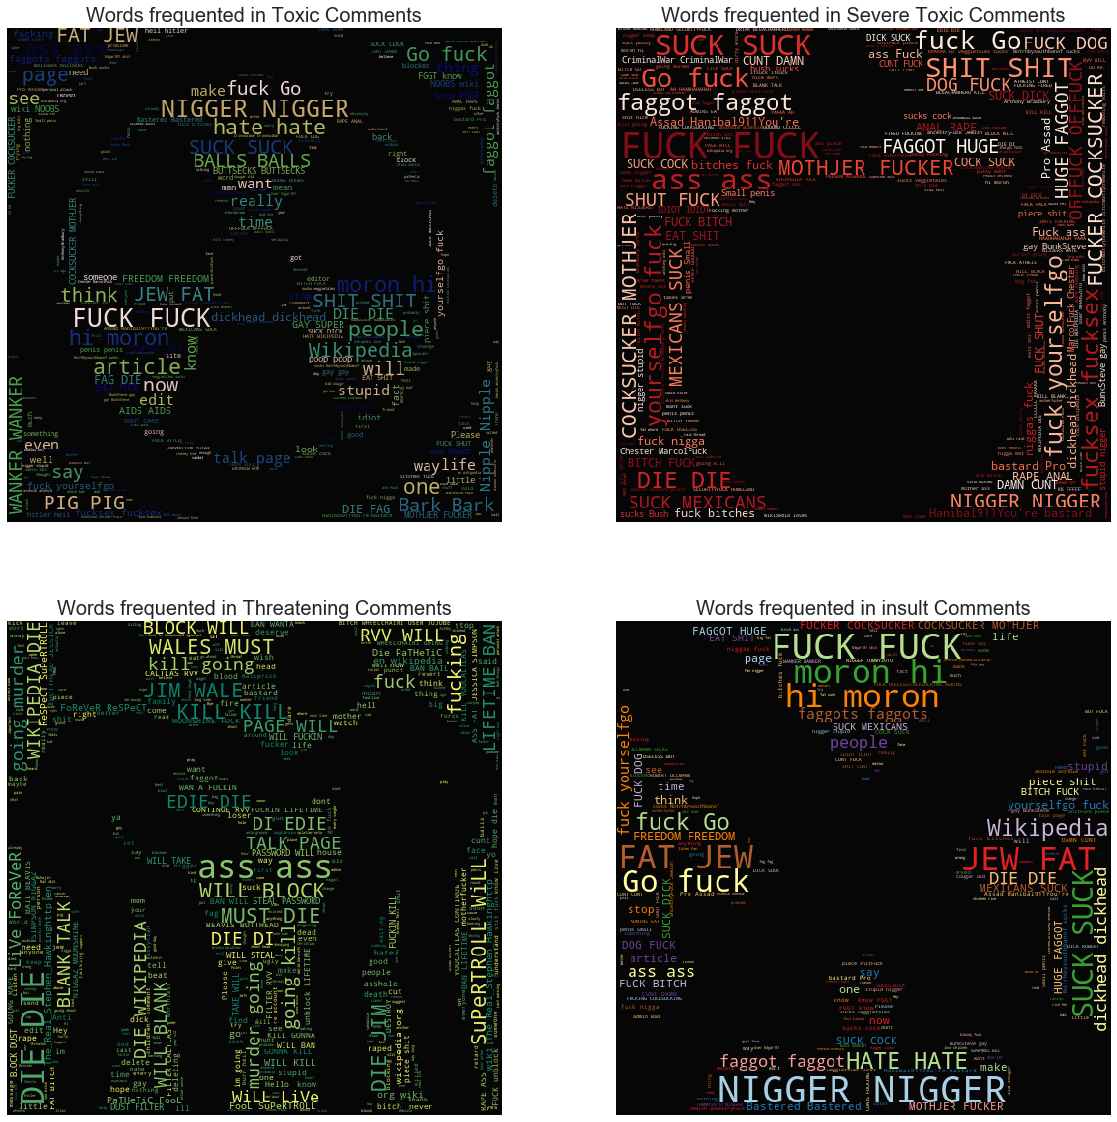

In [23]:
toxic_mask=np.array(Image.open("Img/toxic-sign.png"))
toxic_mask=toxic_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
severe_toxic_mask=np.array(Image.open("Img/bomb.png"))
severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=severe_toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(223)
threat_mask=np.array(Image.open("Img/anger.png"))
threat_mask=threat_mask[:,:,1]
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=threat_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#insult
plt.subplot(224)
insult_mask=np.array(Image.open("Img/swords.png"))
insult_mask=insult_mask[:,:,1]
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

plt.show()


## Part-4: 平衡样本集

在机器学习中我们经常会遇到数据不平衡问题。数据不平衡主要存在于有监督机器学习任务中。当遇到数据不平衡时，以总体分类准确率为学习目标的传统分类算法会过多地关注多数类，从而使得少数样本的分类性能下降。绝大多数常见的机器学习算法对于不平衡数据集都不能很好地工作。

样本不均衡时解决方式主要有下采样和上采样两种方式：

### 下采样 (Under-sampling)

下采样，对于一个不均衡的数据，让目标值(如0和1分类)中的样本数据量相同，且以数据量少的一方的样本数量为准。

获取数据时一般是从分类样本多的数据从**随机抽取**等数量的样本。

### 上采样 (Over-sampling)：

上采样就是以数据量多的一方的样本数量为标准，把样本数量较少的类的样本数量生成和样本数量多的一方相同，称为上采样。

#### 1） 数值型数据
数值数据一般使用SMOTE方法，全称是Synthetic Minority Oversampling Technique，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中。

算法流程如下： 
1. 对于少数类中的每一个样本x，用欧式距离为标准计算它到少数类样本集Smin中所有样本的距离，得到其k近邻
2. 确定采样倍率N,对于每一个少数类样本x,从其k近邻中随机选择若干个样本，假设选择的近邻为x'
3. 对于每一个随机选出的近邻x'，分别与原样本按照如下的公式构建新的样本 xnew=x+rand(0,1)∗(x'−x)

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png" width="100%">

#### 2） 图像型数据
翻转、旋转、尺度变换、随机抠取、色彩抖动、高斯噪声、随机模糊、随机擦除、Fancy PCA、监督式抠取、GAN生成

    
#### 3） 文本

文本数据本身是离散的 -> 数据扩充的自由度不如计算机视觉

1. 保持原文的通顺性：
    * 词替换/句子替换：同义词替换
    * 翻译（经常不靠谱）：在文章中好用，在实际中不一定好用
    * 生成式（十分不靠谱）：机器生成句子
2. 破坏原文通顺性：
    * 增减字/词：随机
    * 替换（随机/易错词）：TFIDF不能太大


## Part-5: 特征工程
特征工程思想大致分为以下三种：

#### 1） 直接特征：
直接由于单词/内容而产生的特征。 我们将探索以下技术：
 * 字频特性
     * 计数功能
     * 二元词组
     * 三元词组
 * 词的向量距离映射(例如：Word2Vec)
 * 情绪评分
 
#### 2） 间接特征：
一些实验特征。
 * 句子数
 * 字数
 * 统计独特的词语
 * 字母数量
 * 标点符号数
 * 大写单词/字母的计数
 * 停止词数
 * 每个字的平均长度
 
#### 3）特殊的特征
从示例中，我们知道注释包含标识符信息(例如：IP、用户名等。 )。
我们可以从它们中创建特性，但是，它肯定会导致对这个特定的Wikipedia用例的**过度拟合**。<div style="color:red">（此处省略！）</div>
 * toxic IP scores
 * toxic users


> 注：首先创建间接和特殊的特征。 有两个原因：
> * 计数特性（直接特性）只有在从干净的语料库创建时才有用
> * 在清理数据集时，间接特性也有助于弥补信息损失

In [24]:
merge=pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df=merge.reset_index(drop=True)

## 间接特征

In [1]:
import nltk
nltk.download() # download stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
## Indirect features
import re
import string
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
#Sentense count in each comment:
    #  '\n' can be used to count the number of sentences in each comment
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [26]:
#derived features
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
#derived features
#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']

In [27]:
#serperate train and test features
train_feats=df.iloc[0:len(train),]
test_feats=df.iloc[len(train):,]
#join the tags
train_tags=train.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


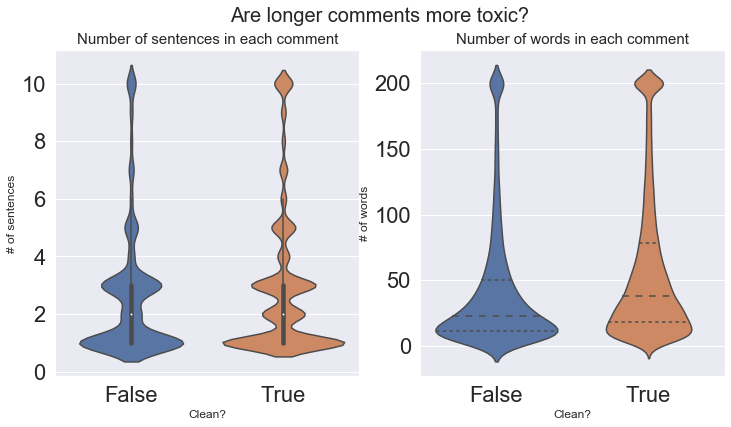

In [28]:
train_feats['count_sent'].loc[train_feats['count_sent']>10] = 10 
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train_feats,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
train_feats['count_word'].loc[train_feats['count_word']>200] = 200
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train_feats,split=True,inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

长句或更多的单词似乎不是毒性的重要指标。

图表描述：小提琴图是传统箱形图的替代。 内部标记显示百分位数，而“小提琴”的宽度显示该级别/实例的评论量。

In [29]:
train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200
#prep for split violin plots
#For the desired plots , the data must be in long format
temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')
#spammers - comments with less than 40% unique words
spammers=train_feats[train_feats['word_unique_percent']<30]

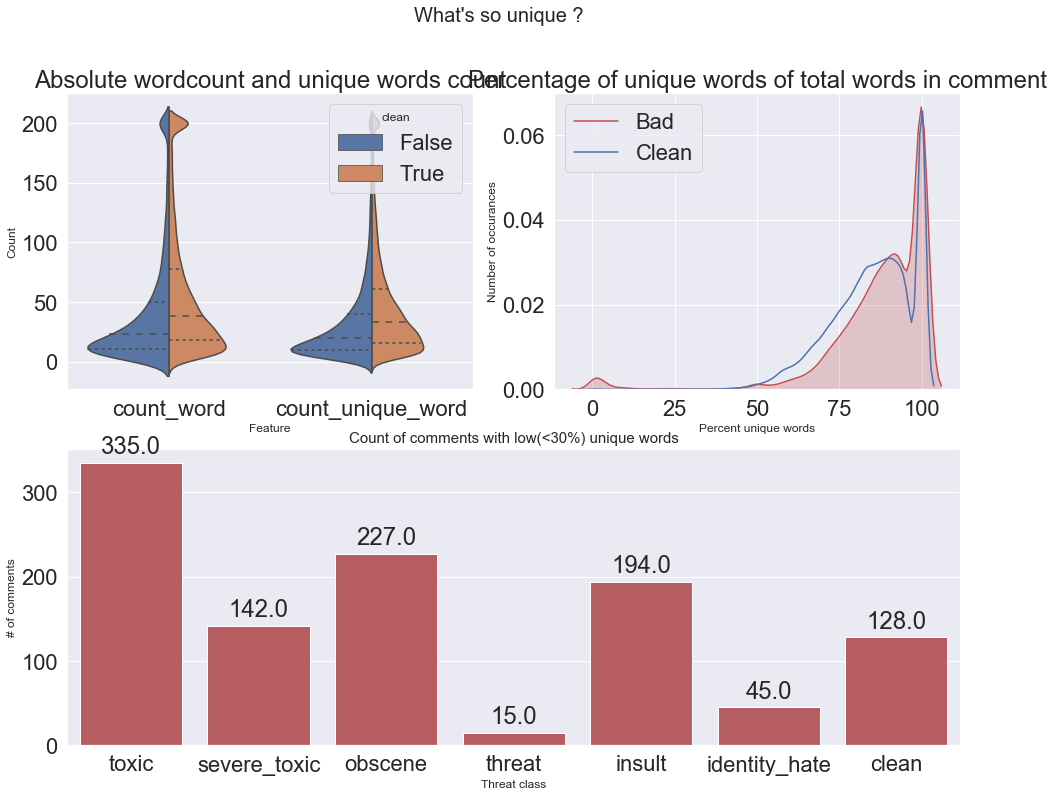

In [30]:
import matplotlib.gridspec as gridspec 
color = sns.color_palette()

plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df,split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)
ax=sns.kdeplot(train_feats[train_feats.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train_feats[train_feats.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)

x=spammers.iloc[:,-7:].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()

### 单词计数VS唯一单词计数：
在干净和有毒的评论中，单词计数和独特单词计数的平均值都有明显的区别。

* 图表描述：第一个图表是一个分裂的小提琴图表。 这是一个传统的盒形图/小提琴图的变体，它允许我们根据一个分类变量在中间分割小提琴。

### 唯一词数百分比：
在0-10%的标记附近有一个凸起，这表明有大量的有毒评论，其中包含的单词非常少。

* 图表描述：第二个图表是两个内核密度估计图的叠加，其中包含干净和有毒的评论中所有单词中唯一单词的百分比。

### 垃圾邮件更有毒！
让我们看看一些干净和有毒的垃圾邮件信息

In [31]:
print("Clean Spam example:")
print(spammers[spammers.clean==1].comment_text.iloc[1])

Clean Spam example:
Towns and Villages in Ark-La-Tex]]
 Cities, boroughs and towns in the Republic of Ireland
 Cities, boroughs, and townships along the Susquehanna River
 Cities, towns and villages in Alborz Province
 Cities, towns and villages in Ardabil Province
 Cities, towns and villages in Bhutan
 Cities, towns and villages in Bushehr Province
 Cities, towns and villages in Chaharmahal and Bakhtiari Province
 Cities, towns and villages in Cyprus
 Cities, towns and villages in Dutch Limburg
 Cities, towns and villages in East Azerbaijan Province
 Cities, towns and villages in East Timor
 Cities, towns and villages in Fars Province
 Cities, towns and villages in Flevoland
 Cities, towns and villages in Friesland
 Cities, towns and villages in Gelderland
 Cities, towns and villages in Gilan Province
 Cities, towns and villages in Golestan Province
 Cities, towns and villages in Groningen
 Cities, towns and villages in Hamadan Province
 Cities, towns and villages in Hormozgan Provinc

In [32]:
print("Toxic Spam example:")
print(spammers[spammers.toxic==1].comment_text.iloc[2])

Toxic Spam example:
User:NHRHS2010 is a homo like mitt romney is. 
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.
 User:NHRHS2010 is a homo like mitt romney is. 
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like mitt romney is. ==
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like mitt romney is. ==
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like mitt romney is. ==
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like 

#### 垃圾邮件对模型也是有毒的！
如果我们设计我们的模型，以包含正常的单词计数功能，那这些垃圾邮件条目可能会使我们的模型产生坏影响。 想象一下，我们的模型训练好后，很可能会从任何评论中提取了“mitt romney”这个词，并将其归类为有毒。

## 直接特征
### 1) 基于计数的特性(对于 单元词)：

让我们根据单词的频率分布创建一些特性。首先让我们考虑一次取一个单词。

Python的SKlearn提供了3种创建计数特性的方法。 他们三个首先创建一个单词的词汇表（字典），然后为字典中存在的句子中的单词创建一个[稀疏矩阵](https://en.wikipedia.org/wiki/Sparse_matrix)。它们分别是：

* CountVectorizer
    * 创建文本语料库中每个单词的频率计数矩阵
* TF-IDF Vectorizer
    * TF-术语频率-文本语料库中单词（术语）的计数
    * IDF-逆文档频率-惩罚过于频繁的单词。 我们可以认为这是正规化
* Hashing Vectorizer
 * 创建一个hashmap（基于散列技术的单词到数字映射），而不是一个词汇表字典
 * 这使它能够更可伸缩和更快的更大的文章
 * 可以跨多个线程并行化

在这里使用TF-IDF。
> 注意：在实际情况中，我们使用全量数据表，它来自train和test数据集的文本，以确保我们创建的词汇表不会遗漏唯一在testset出现的单词。

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [35]:
# 因实验演示，我们随机取出2000个样本，实际训练时需要把全量数据一起做操作
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

### 数据清洗
我们首先将评论转换为小写，然后使用自定义函数从注释中删除html标记、标点符号和非字母字符。

In [36]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [37]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
138368,e44b789a55a34a7c,hi enemy you will never be able to get rid of ...,1,0,1,0,1,1
101833,20e7b7da274a2b49,you deleted everything i had added to the page...,0,0,0,0,0,0
32145,55739a32b8bdf9cc,sock action hello there i noticed you had some...,0,0,0,0,0,0
37340,63b1921568ba553e,stop vandalising sokollu mehmed pasha article ...,0,0,0,0,0,0
85728,e54ee6e3da7baaf1,what do we mean by oral culture hl en q what d...,0,0,0,0,0,0


### 移除停用词

接下来，我们使用可以从NLTK库下载的默认停止词集删除注释中存在的所有停用词。 我们还在标准列表中添加了几个停用词。

停止词基本上是任何语言中常用的一组词，而不仅仅是英语。 停止词对许多应用程序至关重要的原因是，如果我们删除特定语言中非常常用的单词，我们可以将重点放在更重要的单词上。

In [38]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
138368,e44b789a55a34a7c,hi enemy never able get rid faggot,1,0,1,0,1,1
101833,20e7b7da274a2b49,deleted everything added page put time...,0,0,0,0,0,0
32145,55739a32b8bdf9cc,sock action hello noticed issues sock pu...,0,0,0,0,0,0
37340,63b1921568ba553e,stop vandalising sokollu mehmed pasha article ...,0,0,0,0,0,0
85728,e54ee6e3da7baaf1,mean oral culture hl en q mean oral c...,0,0,0,0,0,0


### 词干提取（Stemming）

下一步我们做词干提取。英文语法中现存很多不同的词干，它们基本上将语义大致相同的词转化为一种标准形式。 例如，for amusing, amusement, and amused， 他们的词干都是 amus。

In [39]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
138368,e44b789a55a34a7c,hi enemi never abl get rid faggot,1,0,1,0,1,1
101833,20e7b7da274a2b49,delet everyth ad page put timelin that revert ...,0,0,0,0,0,0
32145,55739a32b8bdf9cc,sock action hello notic issu sock puppetri with,0,0,0,0,0,0
37340,63b1921568ba553e,stop vandalis sokollu mehm pasha articl cyril ...,0,0,0,0,0,0
85728,e54ee6e3da7baaf1,mean oral cultur hl en q mean oral cultur shif...,0,0,0,0,0,0


### 拆分训练集和测试集

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [41]:
train_text = train['comment_text']
test_text = test['comment_text']

### 计算TF-IDF
在将数据集分割成训练和测试集之后，我们希望总结我们的注释并将它们转换为数值向量。

一种技术是选择最常见的术语(术语频率高或TF)。 然而，最常见的单词是一个不太有用的度量，因为一些单词，如“this”、“a”，在所有文档中都非常频繁地出现。

<img src="https://pic1.zhimg.com/80/v2-393435b342546a2f1736d1d755adb1cd_1440w.jpg" width="70%">

因此，我们也想要一个衡量一个词是多么独特的。即，这个词在所有文档中出现的频率很少(逆文档频率或IDF)。

<img src="https://pic2.zhimg.com/80/v2-1d5c436e04f497544d72fec6909a3fad_1440w.jpg" width="70%">

因此，一个单词的tf & idf(TF-IDF)的乘积给出了这个单词在文档中的频繁程度乘以该单词的在整个文档库中出现的频率。文档中tfidf评分较高的单词经常出现在文档中，并提供了有关该特定文档的最大信息量。

> TF-IDF很容易计算，但它的缺点是它不能捕获文本中的位置、语义、不同文档中的共存等。

### uni-gram, bi-gram, tri-gram

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
# uni-gram
# vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', 
#                              ngram_range=(1,1), norm='l2')
# bi-gram
# vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', 
#                              ngram_range=(2,2), norm='l2')
# tri-gram
# vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', 
#                              ngram_range=(3,3), norm='l2')
# uni-gram, bi-gram, tri-gram
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', 
                             ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [43]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

### Next steps:
- 添加 Word2Vec 和 Glove 向量特征
- 探索情感分析分数
- [文本主题分析](https://www.kaggle.com/jagangupta/understanding-the-topic-of-toxicity)

## Part-5: 多标签分类技术

#### 多标签分类的难点

- (1)类标数量不确定，有些样本可能只有一个类标，有些样本的类标可能高达几十甚至上百个。 

- (2)类标之间相互依赖，例如包含蓝天类标的样本很大概率上包含白云，如何解决类标之间的依赖性问题也是一大难点。

- (3)多标签的训练集比较难以获取。

#### 方法

目前有很多关于多标签的学习算法，依据解决问题的角度，这些算法可以分为两大类:一是基于问题转化的方法，二是基于算法适用的方法。

- 基于问题转化的方法是转化问题数据，使之使用现有算法；
- 基于算法适用的方法是指针对某一特定的算法进行扩展，从而能够处理多标记数据，改进算法，适用数据。


### 基于问题转化的方法
基于问题转化的方法中有的考虑标签之间的关联性，有的不考虑标签的关联性。

### Multiple Binary Classifications - (Binary Relevance)
最简单的不考虑关联性的算法将**多标签中的每一个标签当成是单标签，对每一个标签实施常见的分类算法**。具体而言，在传统机器学习的模型中对每一类标签做二分类，可以使用SVM、DT、Naïve Bayes、DT、Xgboost等算法；在深度学习中，对每一类训练一个文本分类模型(如：textCNN、textRNN等)。

例如，让我们考虑一个案例，如下所示。我们有这样的数据集，其中X是独立的特征，Y是目标变量。

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230613/Screen-Shot-2017-08-21-at-1.42.27-AM.png" width="30%">

在Binary Relevance方法中，将此问题分解为4个不同的单类分类问题，如下图所示。

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230630/Screen-Shot-2017-08-21-at-1.46.00-AM.png" width="60%">

> 大多数传统的学习算法都是针对单标签分类问题而开发的。 因此，文献中的许多方法将多标签问题转化为多个单标签问题，从而可以使用现有的单标签算法。

在我们的项目中，它更像是问简单的问题，比如“评论是否有毒”、“评论是否威胁？”等等。


In [44]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [52]:
%%time

# using binary relevance
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8783333333333333


CPU times: user 8.22 s, sys: 5.26 s, total: 13.5 s
Wall time: 13.9 s


### Classifier Chains
**考虑多标签的相关性**的时候可以将上一个输出的标签当成是下一个标签分类器的输入。

在传统机器学习模型中可以使用**分类器链**。
在这种情况下，第一个分类器只在输入数据上进行训练，然后每个分类器都在输入空间和链上的所有之前的分类器上进行训练。

<img src="https://miro.medium.com/max/2000/1*ycwr_uE8_5lnOMNCnFOuXQ.png" width="100%">

让我们试着通过一个例子来理解这个问题。在下面给出的数据集里，我们将X作为输入空间，而Y作为标签。在分类器链中，这个问题将被转换成4个不同的标签问题，就像下面所示。黄色部分是输入空间，白色部分代表目标变量。

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25233225/Screen-Shot-2017-08-25-at-11.31.58-PM.png" width="80%">


In [46]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [53]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8983333333333333


CPU times: user 43.7 s, sys: 8.46 s, total: 52.1 s
Wall time: 15.3 s


### 3.4. Label Powerset

除了将标签分开看之外，还有将标签统一来看(Label Powerset)。在这方面，我们将问题转化为一个多类问题，一个多类分类器在训练数据中发现的所有唯一的标签组合上被训练。让我们通过一个例子来理解它。

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230858/Screen-Shot-2017-08-25-at-12.46.30-AM.png" width="40%">

在这一点上，我们发现x1和x4有相同的标签。同样的，x3和x6有相同的标签。因此，标签powerset将这个问题转换为一个单一的多类问题，如下所示。

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230915/Screen-Shot-2017-08-25-at-12.46.37-AM.png" width="20%">

因此，标签powerset给训练集中的每一个可能的标签组合提供了一个独特的类。转化为单标签后就可以使用SVM、textCNN、textRNN等分类算法训练模型了。

感觉Label Powerset只适合标签数少的数据，一旦标签数目太多(假设有n个)，使用Label Powerset后可能的数据集将分布在[0,2n-1]空间内，数据就会很稀疏。

In [48]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [54]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8983333333333333


CPU times: user 50.2 s, sys: 7.79 s, total: 58 s
Wall time: 10.8 s


### 基于算法适用的方法
改编算法来直接执行多标签分类，而不是将问题转化为不同的问题子集。

在传统机器学习模型中创建的多标签分类模型有:
- kNN多标签版本MLkNN；
- SVM的多标签版本Rank-SVM等，具体可以查看scikit-multilearn [Doc](http://scikit.ml/api/skmultilearn.html#classifiers-and-tools)。

在深度学习中常常是修改**多分类模型的输出层**，使其适用于多标签的分类。

In [50]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [55]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.8883333333333333


CPU times: user 3min 8s, sys: 947 ms, total: 3min 9s
Wall time: 3min 10s


# 总结

解决多标签分类问题的方法主要有两种：问题变换方法和算法自适应方法。
- 问题转换方法将多标签问题转化为一组二分类问题，然后使用单类分类器进行处理。
- 算法适应方法则使算法适应于直接进行多标签分类。换句话说，他们不是试图将问题转化为一个更简单的问题，而是试图以完整的形式解决问题。

在与其他方法的广泛比较中，label-powerset方法得分最好。

在此数据集上运行ML-KNN和label-powerset都需要相当长的时间，因此对训练数据的随机样本进行了实验。

进一步改进：
- 在深度学习中使用LSTMS可以解决同样的问题。
- 为了提高速度，我们可以使用决策树，为了在速度和精度之间进行合理的权衡，我们也可以选择集成模型。
- 其他框架如MEKA可以用来处理多标签分类问题。

# 第一名经验分享

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/52557